In [17]:
from deap import base, creator, tools, algorithms
import cma
import numpy as np
import matplotlib.pyplot as plt
import array
import random

In [99]:
def rosen_f(X):
    x, y = X
    return 100 * (y - x ** 2)**2 + (x - 1)**2

def rosen_f_tuple(X):
    return (rosen_f(X),)

def egg_f(X):
    x, y = X
    x = np.clip(x, -512, 512)
    y = np.clip(y, -512, 512)
    return -(y + 47) * np.sin(np.sqrt(np.abs(y + (x/2) + 47))) - x * np.sin(np.sqrt(np.abs(x - (y + 47))))

def egg_f_tuple(X):
    return (egg_f(X),)

In [24]:
def plot_rosen():
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-5, 5, 1000)

    X, Y = np.meshgrid(x, y)
    Z = rosen_f((X, Y,))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z)

    plt.show()


def plot_egg():
    x = np.linspace(-600, 600, 1000)
    y = np.linspace(-600, 600, 1000)

    X, Y = np.meshgrid(x, y)
    Z = egg_f((X, Y,))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z)

    plt.show()

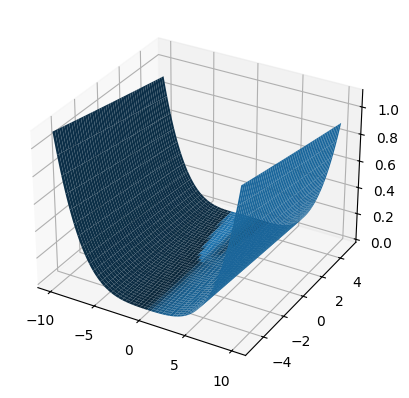

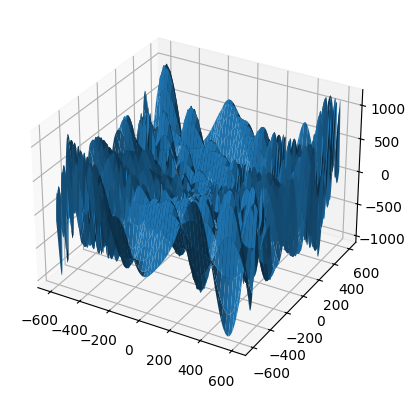

In [25]:
plot_rosen()
plot_egg()

In [21]:
IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY = 2, -10, 10, 0.05, 1.2

def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

toolbox = base.Toolbox()

toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rosen_f_tuple)

toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

def main():
    MU, LAMBDA = 20, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", np.mean)
    # stats.register("std", np.std)
    # stats.register("min", np.min)
    # stats.register("max", np.max)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=800, stats=stats, halloffame=hof, verbose=False)

    # return pop, logbook, hof
    print('El mejor individuo es', hof[0], rosen_f(hof[0]))

main()

c:\Users\bryan\Documents\GitHub\Synth\venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\bryan\Documents\GitHub\Synth\venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\bryan\Documents\GitHub\Synth\venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


El mejor individuo es Individual('d', [2.13310871078869, 4.554164253123185]) 1.285544548511206


In [22]:
# Punto inicial y sigma inicial
x0 = np.array([-10.0, 5.0])  # centroid inicial
sigma0 = 5.0               # desviación inicial

# Ejecutar CMA-ES
res = cma.fmin(rosen_f, x0, sigma0, options={'popsize':20, 'maxiter':100})

# Mejor solución encontrada
print("Mejor individuo:", res[0])
print("Valor de la función:", res[1])

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 2 (seed=896989, Wed Jan  7 21:21:09 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 1.474818095654256e+01 1.0e+00 8.82e+00  9e+00  1e+01 0:00.0
    2     40 8.062838007692449e+03 1.3e+00 1.36e+01  1e+01  2e+01 0:00.0
    3     60 2.399662739138787e+03 1.2e+00 1.25e+01  8e+00  1e+01 0:00.0
   81   1620 4.318681518442844e-17 4.4e+01 1.04e-01  2e-08  4e-08 0:00.1
termination on {'tolfun': 1e-11} (Wed Jan  7 21:21:09 2026)
final/bestever f-value = 4.268133e-17 2.510062e-17 after 1621/1582 evaluations
incumbent solution: [1., 1.]
std deviations: [1.79674443e-08, 3.58637357e-08]
Mejor individuo: [1. 1.]
Valor de la función: 2.5100621377978177e-17


In [277]:
IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY = 2, -512, 512, 0, 200

def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

toolbox = base.Toolbox()

toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", egg_f_tuple)

toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

def main():
    MU, LAMBDA = 100, 500
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", np.mean)
    # stats.register("std", np.std)
    # stats.register("min", np.min)
    stats.register("max", np.max)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=500, stats=stats, halloffame=hof, verbose=True)

    # return pop, logbook, hof
    print('El mejor individuo es', hof[0], egg_f(hof[0]))

main()

gen	nevals	max    
0  	100   	691.211
1  	458   	135.158
2  	451   	270.96 
3  	446   	274.313
4  	456   	107.82 
5  	445   	59.8002
6  	453   	86.3887
7  	447   	19.1209
8  	452   	-601.552
9  	451   	-714.276
10 	459   	-740.63 
11 	454   	-777.684
12 	455   	-781.085
13 	446   	-250.196
14 	457   	-283.201
15 	445   	-240.932
16 	442   	239.257 
17 	447   	26.7193 
18 	440   	-887.01 
19 	458   	-887.838
20 	449   	-887.838
21 	442   	-889.037
22 	453   	-892.156
23 	450   	-898.884
24 	455   	-901.011
25 	456   	-904.2  
26 	455   	-904.727
27 	445   	-906.066
28 	457   	-907.681
29 	453   	-908.358
30 	435   	-909.544
31 	458   	-910.396
32 	450   	-911.483
33 	447   	-911.854
34 	454   	-912.144
35 	445   	-912.199
36 	452   	-912.209
37 	454   	-912.227
38 	447   	-912.247
39 	465   	-912.322
40 	446   	-912.349
41 	454   	-912.376
42 	447   	-912.399
43 	450   	-912.42 
44 	457   	-912.889
45 	444   	-914.754
46 	460   	-914.939
47 	455   	-915.004
48 	448   	-915.013
49 	437  

In [280]:
# Punto inicial y sigma inicial
x0 = np.array([0,0])  # centroid inicial
sigma0 = 200               # desviación inicial

# Ejecutar CMA-ES
res = cma.fmin(egg_f, x0, sigma0, options={'popsize':500, 'maxiter':500})

# Mejor solución encontrada
print("Mejor individuo:", res[0])
print("Valor de la función:", res[1])

(250_w,500)-aCMA-ES (mu_w=128.6,w_1=2%) in dimension 2 (seed=925276, Wed Jan  7 22:13:57 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    500 -6.676570184516704e+02 1.0e+00 2.08e+02  2e+02  3e+02 0:00.0
    2   1000 -6.849767321827067e+02 1.1e+00 2.19e+02  3e+02  3e+02 0:00.1
    3   1500 -8.894941753706171e+02 1.2e+00 2.27e+02  4e+02  4e+02 0:00.1
NOTE (module=cma, iteration=28):  
condition in coordinate system exceeded 2.1e+08, rescaled to 1.0e+00, 
condition changed from 5.6e+07 to 1.2e+00
   42  21000 -8.586012151485547e+02 8.6e+03 2.63e+02  7e-07  2e+02 0:01.1
termination on {'tolfun': 1e-11} (Wed Jan  7 22:13:58 2026)
final/bestever f-value = -8.586012e+02 -9.594255e+02 after 21001/5993 evaluations
incumbent solution: [ 356.34418688, 1774.3757361, ]
std deviations: [7.13659908e-07, 1.58819223e+02]
Mejor individuo: [629.59226929 403.79608052]
Valor de la función: -959.4254656294552
